In [1]:
!pip install opencv-python scikit-image scikit-learn matplotlib



[notice] A new release of pip is available: 25.1.1 -> 26.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt

from skimage.feature import local_binary_pattern, hog, graycomatrix, graycoprops
from skimage.morphology import skeletonize
from sklearn.preprocessing import StandardScaler


In [6]:
DATASET_PATH = "."


In [10]:
def get_sample_image(path):
    for surface in ["Decks", "Pavements", "Walls"]:
        surface_path = os.path.join(path, surface)
        for category in os.listdir(surface_path):
            category_path = os.path.join(surface_path, category)
            for file in os.listdir(category_path):
                if file.endswith(".jpg"):
                    return cv2.imread(os.path.join(category_path, file))
    return None

img = get_sample_image(DATASET_PATH)


In [11]:
images, labels = load_images(DATASET_PATH)
print("Total Images:", len(images))
print("Cracked:", np.sum(labels==1))
print("Non Cracked:", np.sum(labels==0))


Total Images: 16864
Cracked: 8475
Non Cracked: 8389


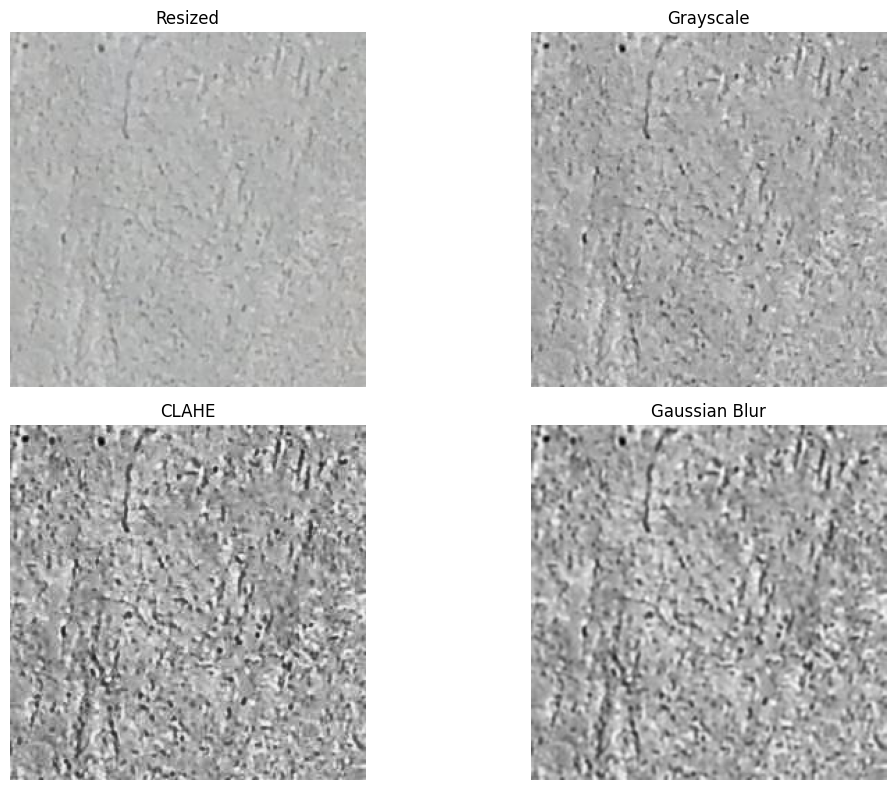

In [12]:
resized = cv2.resize(img, (256,256))

# ---------------- STEP 2: Grayscale ----------------
gray = cv2.cvtColor(resized, cv2.COLOR_BGR2GRAY)

# ---------------- STEP 3: CLAHE ----------------
clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8,8))
clahe_img = clahe.apply(gray)

# ---------------- STEP 4: Gaussian Blur ----------------
blur = cv2.GaussianBlur(clahe_img, (3,3), 0)

# ---------------- DISPLAY ALL ----------------
plt.figure(figsize=(12,8))

plt.subplot(2,2,1)
plt.imshow(cv2.cvtColor(resized, cv2.COLOR_BGR2RGB))
plt.title("Resized")
plt.axis("off")

plt.subplot(2,2,2)
plt.imshow(gray, cmap="gray")
plt.title("Grayscale")
plt.axis("off")

plt.subplot(2,2,3)
plt.imshow(clahe_img, cmap="gray")
plt.title("CLAHE")
plt.axis("off")

plt.subplot(2,2,4)
plt.imshow(blur, cmap="gray")
plt.title("Gaussian Blur")
plt.axis("off")

plt.tight_layout()
plt.show()



In [13]:
import os
import cv2

# Dataset path (since folders are in same directory)
DATASET_PATH = "."

# New folder to save processed images
OUTPUT_PATH = "processed_dataset"

# Create output folder if not exists
os.makedirs(OUTPUT_PATH, exist_ok=True)

surfaces = ["Decks", "Pavements", "Walls"]

for surface in surfaces:
    surface_path = os.path.join(DATASET_PATH, surface)

    for category in os.listdir(surface_path):
        category_path = os.path.join(surface_path, category)

        if not os.path.isdir(category_path):
            continue

        # Create same folder structure in output
        save_folder = os.path.join(OUTPUT_PATH, surface, category)
        os.makedirs(save_folder, exist_ok=True)

        for file in os.listdir(category_path):
            if file.endswith(".jpg"):
                
                img_path = os.path.join(category_path, file)
                img = cv2.imread(img_path)

                # -------- STEP 1: Resize --------
                resized = cv2.resize(img, (256,256))

                # -------- STEP 2: Grayscale --------
                gray = cv2.cvtColor(resized, cv2.COLOR_BGR2GRAY)

                # -------- STEP 3: CLAHE --------
                clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8,8))
                clahe_img = clahe.apply(gray)

                # -------- STEP 4: Gaussian Blur --------
                blur = cv2.GaussianBlur(clahe_img, (3,3), 0)

                # Save final processed image
                save_path = os.path.join(save_folder, file)
                cv2.imwrite(save_path, blur)

print("✅ All images processed and saved successfully!")


✅ All images processed and saved successfully!
